<a href="https://colab.research.google.com/github/yamihe19/Briefing-Notes-Catering-Event-/blob/main/Code_Project_Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project-Titanic-Prediction

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics!

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data.


1- For this project, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot.

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



**Here is the [GitHub Project](https://github.com/yamihe19/Assignment_3_P2.git)**

## 1. Exploratory Data Analysis


#### Reading the data and beginnig with the exploratory Data Analysis


In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
%matplotlib inline
import missingno as msno
tic = pd.read_csv('titanic.csv')
tic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Getting the data types and the columns

To be able to see the data information types and the entries

In [ ]:
tic.info()

# Survived, Pclass and Sex category data types will be changed for easier analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
tic['Survived']= tic['Survived'].astype('object')
tic['Pclass']= tic['Pclass'].astype('object')
tic['Sex']= tic['Sex'].astype('object')
tic.info() # Categories changed to object type to use them in the hypothesis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


#### Describing the description of the data in the DataFrame

In [ ]:
tic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


#### Looking for the variables of my dataframe

In [ ]:
tic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Checking for null values

To explore my data and be able to see the null values into the variables

In [ ]:
tic.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
(tic.isnull().sum().sort_values(ascending = False)/891)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

<AxesSubplot:>

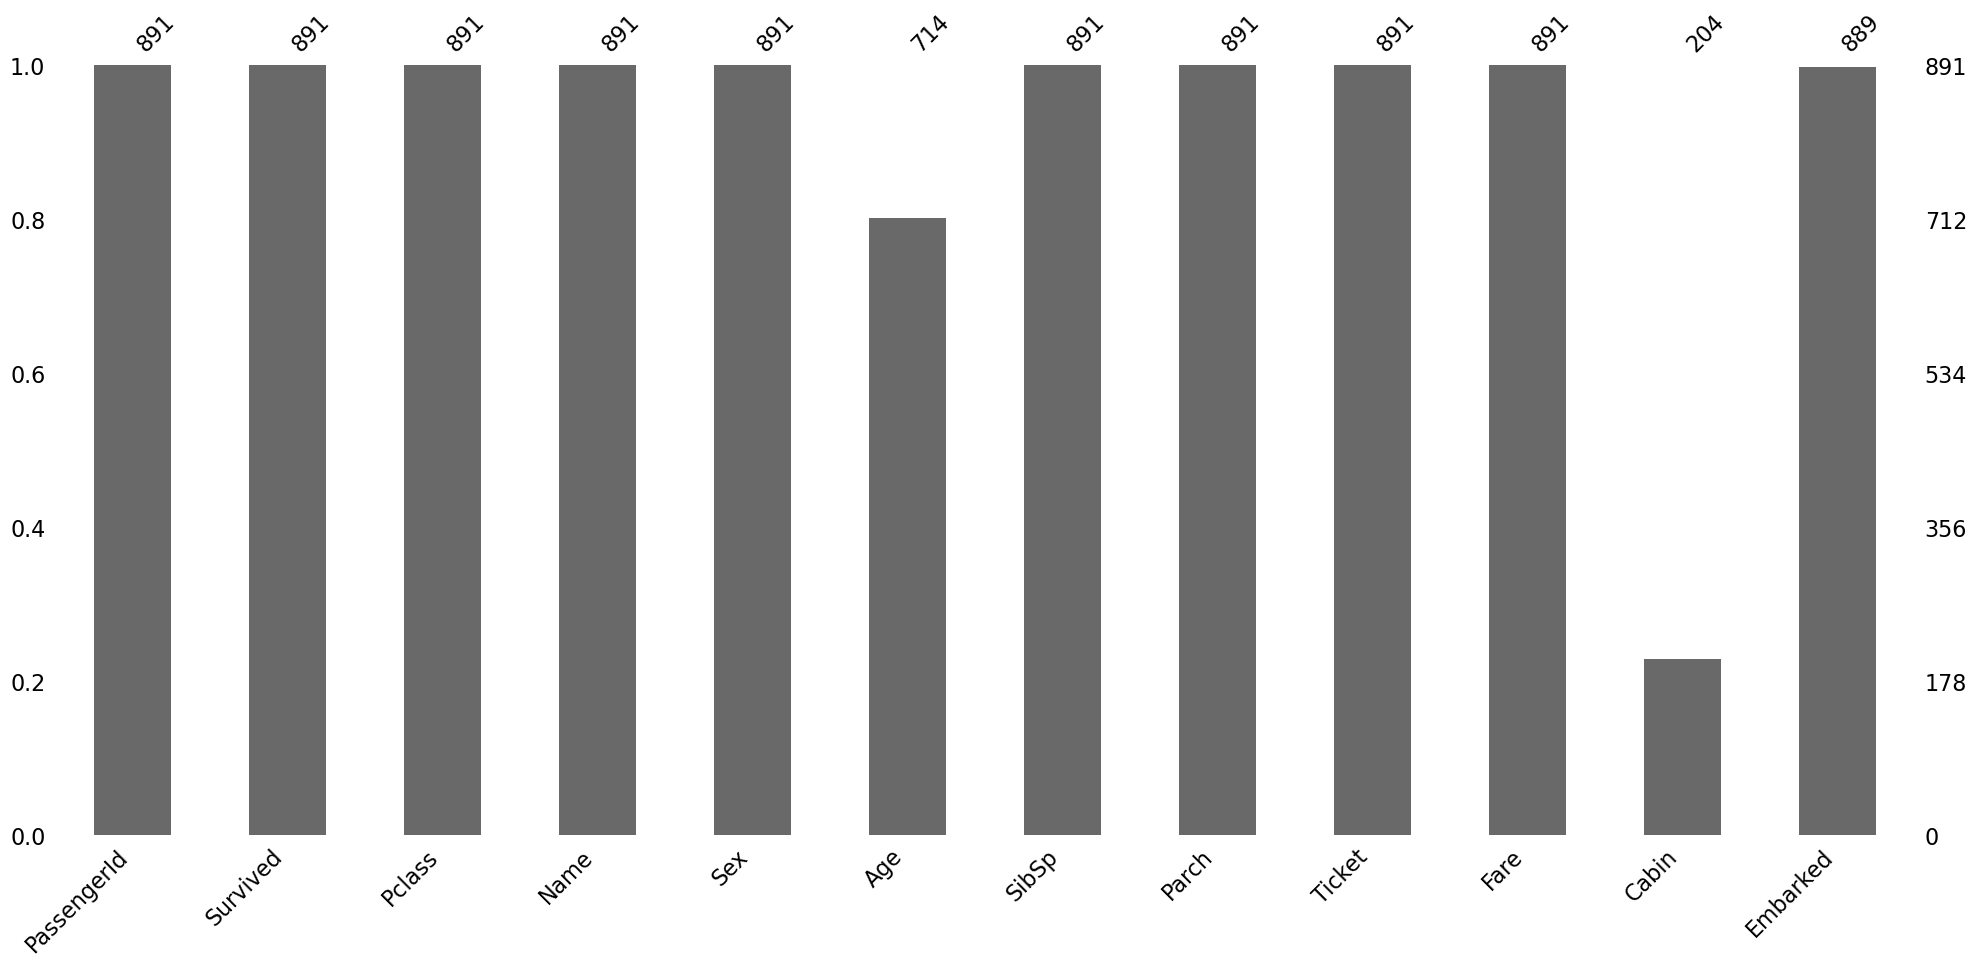

In [ ]:
msno.bar(tic)

In [ ]:
(tic.isnull().sum().sort_values(ascending = False)/891)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

Cabin, Age and Embarked have a missing values.
Missing values in Cabin represent 77.10% of its data, Age missing values represent 19.86%, and Embarked is less than 0.22% of missing values.

#### Looking for unique values in my categorical variables

In [ ]:
def unique_value(df, column_names):
    uniques = []
    for name in column_names:
        uniques.append(df[name].unique())
    return uniques

unique_value(tic, ['Pclass','Sex', 'Survived', 'Embarked'])

[array([3, 1, 2], dtype=object),
 array(['male', 'female'], dtype=object),
 array([0, 1], dtype=object),
 array(['S', 'C', 'Q', nan], dtype=object)]

####  Counting the values of the variables

In [ ]:
def counts_value(df, column_name):
    counts = []
    for name  in column_name:
        counts.append(df[name].value_counts())
    return name, counts

counts_value(tic, ['Pclass','Sex', 'Survived', 'Embarked'])


('Embarked',
 [3    491
  1    216
  2    184
  Name: Pclass, dtype: int64,
  male      577
  female    314
  Name: Sex, dtype: int64,
  0    549
  1    342
  Name: Survived, dtype: int64,
  S    644
  C    168
  Q     77
  Name: Embarked, dtype: int64])

In [ ]:
print(tic['PassengerId'].nunique())

891


In [ ]:
Per_of_survived = (tic[['Survived']].value_counts()/891)*100
print(Per_of_survived)

Survived
0           61.616162
1           38.383838
dtype: float64


In [ ]:
per_Gender = (tic[['Sex']].value_counts()/891)*100
print(per_Gender)

Sex   
male      64.758698
female    35.241302
dtype: float64


In [ ]:
per_Class = (tic[['Pclass']].value_counts()/891)*100
print(per_Class)

Pclass
3         55.106622
1         24.242424
2         20.650954
dtype: float64


In [ ]:
tic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Conclusions
* 891 People were on the Titanic.
* 549 of them died and 342 lived.
* The percentage of people who died was 61.61% and people who lived was 38.38%
* 577 were female and 314 male. The percentage of female was 64.75% and male was 35.34%.
* People from first class were 216, from second class were 184 and from third class were 491.
* The first class represented 24.24%, second class 20.65% and third class 55.10% of people.
* Age ranged from 0.42 yrs(min) to 80 yrs (max).
* There are 12 variables in dataframe, 7 of them are categorical variables.
* The maximun value of the fare was 512.329200
* Just Age, Cabin and Embarked are variables with null entries.


## Hypothesis 1

### Determine if the survival rate is associated to the class of passenger
##### Bivariate analysis

#### Tables of frecuencies and percentages between the variables

In [ ]:
class_surv= pd.crosstab(tic['Pclass'], tic['Survived'])
class_surv


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
class_per= pd.crosstab(tic['Pclass'], tic['Survived']).apply(lambda x: round((x/x.sum())*100,2), axis =0)
class_per


Survived,0,1
Pclass,,
1,14.57,39.77
2,17.67,25.44
3,67.76,34.80


In [ ]:
class_per= pd.crosstab(tic['Pclass'], tic['Survived']).apply(lambda x: round((x/x.sum())*100,2), axis =1)
class_per

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


#### Data Visualization for Pclass and Survive Variables

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

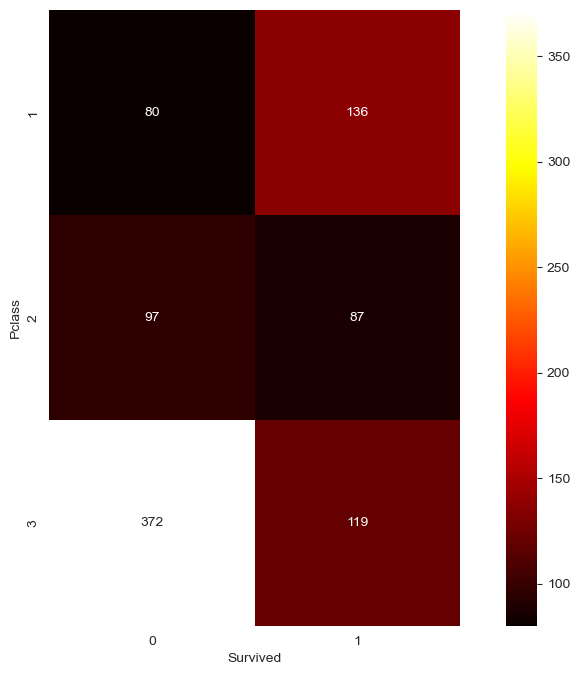

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(class_surv,annot=True, fmt='g',square=True,cmap='hot')


From the 891 people on the Titanic, most of the third class people died and most of the first class survived.
The heatmap shows clearly that tendency.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

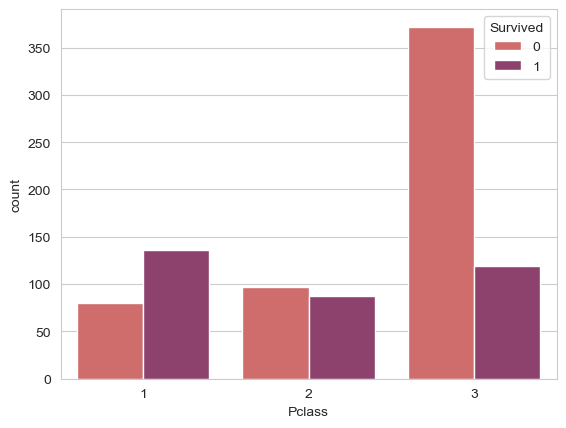

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Pclass', data = tic, hue= "Survived", palette = 'flare')

The countplot shows that the variables are not independent from each other. The number of people that survived was closely related to the passenger's class.

#### Calculating Statistical  Chi square Test:

Conducting Chi-squared test to establish whether the Survived and Age variables are related.         
* Dependent Variable: Survived                                                                            
* Independent Variable: Pclass


Ho: The variables Pclass and Survived are independent from each other. They have no relation.

Ha: The variables Pclass and Survived are not independent from each other. They have a correlation

In [ ]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(class_surv)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)
# chi2_stat > P


Chi square value is  102.88898875696056
P value is 4.549251711298793e-23
Degrees of Freedom: 2


Because Chi square value is bigger than P value and P value is smaller than 0.05, I have enough evidence to reject the Ho Hypothesis and conclude that the variables have a correlation and are dependent. In others words, People in higher class had more chance to live than people in lower class.  

#### Conclusions:
75% of people from third class died.
62.96% percent of people from first class lived.
The graph clearly shows that the 1st class had more posibilities to survive than the rest.
Indeed, survivability seems to be correlated with the Pclass.

## Hypothesis 2

### Determine if the survival rate is associated to the gender

##### Bivariate analysis



#### Tables of frecuencies and percentages between the variables

In [ ]:
sex_surv= pd.crosstab(tic['Sex'], tic['Survived'])
sex_surv
# Frecuency table of Sex and Survived

Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
sex_Surv_Per= pd.crosstab(tic['Sex'], tic['Survived']).apply(lambda x: round((x/x.sum())*100,2), axis =0)
sex_Surv_Per
# Its clearly show that the female had more possibilities to survived that male

Survived,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


Using crosstab rowwise to obtain those percentage

In [ ]:
sex_Surv_Per= pd.crosstab(tic['Sex'], tic['Survived']).apply(lambda x: round((x/x.sum())*100,2), axis = 1)
sex_Surv_Per

Survived,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


#### Data Visualization for Sex and Survive Variables

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

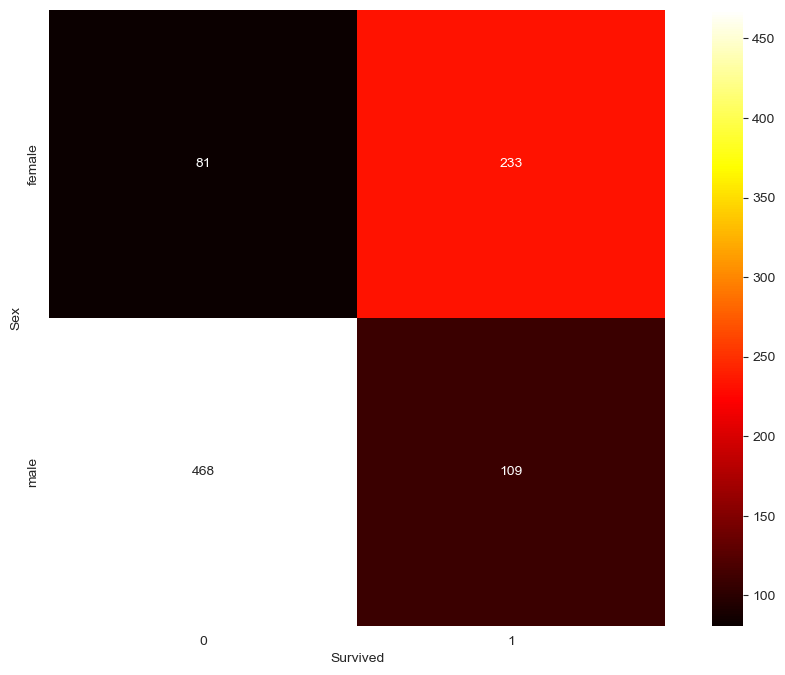

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(sex_surv,annot=True, fmt='g',square=True,cmap='hot')


From the 891 people on the Titanic, most of the Male died (468) and most of the female survived (233). The Heatman shows clearly that tendency.

<AxesSubplot:xlabel='Sex', ylabel='count'>

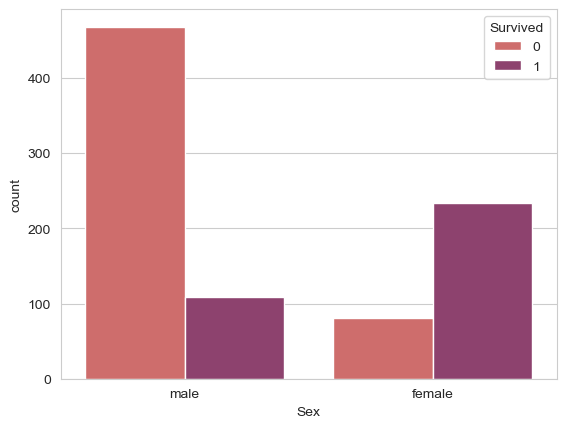

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Sex', data = tic, hue= "Survived", palette = 'flare')


The countplot shows that the variables are not independent from each other. That means that the people that survived was closely related to the gender. In others words, Female had more opportunities to live.

#### Calculating Statistical  Chi square Test:
Conducting Chi-squared test to establish whether the Survived and Age variables are related.         
* Dependent Variable: Survived                                                                            
* Independent Variable: Sex


Ho: The variables Sex and Survived are independent from each other. They have no correlation

Ha: The variables Sex and Survived are not independent from each other. They have a correlation

In [ ]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(sex_surv)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)
# chi2_stat > P
# 260.71 > 1.19

Chi square value is  260.71702016732104
P value is 1.1973570627755645e-58
Degrees of Freedom: 1


Because Chi square value is bigger than P value and P value is smaller than 0.05, I have enough evidence to reject the Ho Hypothesis and conclude that the variables have a correlation and are dependent. In others words, Female people had more opportunities to live than than male.  

#### Conclusions:
Just 18.89% of male survived and 74.20% of female survived.
People who were female had more possibilities to live.
Indeed, survivability seems to be correlated with the Gender.
Chi Squared Test shows that the variable are dependant to each other.

## Hypothesis 3

### Determine if the survival rate is associated to the Age

##### Bivariate analysis



#### Tables of frecuencies and percentages between the variables

First, the missing values in Age column are going to be replaced with the mean for further analysis.

In [ ]:
tic['Age'].fillna(tic['Age'].mean(), inplace = True)

tic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_ranges     177
dtype: int64

Describing the data with statistic numbers:

In [ ]:
no_surv = tic[tic['Survived'] == 0]['Age']
surv = tic[tic['Survived'] == 1]['Age']
print(no_surv.describe())
print(surv.describe())

count    549.000000
mean      30.415100
std       12.457370
min        1.000000
25%       23.000000
50%       29.699118
75%       35.000000
max       74.000000
Name: Age, dtype: float64
count    342.000000
mean      28.549778
std       13.772498
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


The mean of people who survived and those who did not survive are similar, but the mean for people that survived is slightly smaller (28.549778).

#### Data Visualization for Sex and Survive Variables
For one categorical and numerical variable

<Figure size 400x400 with 0 Axes>

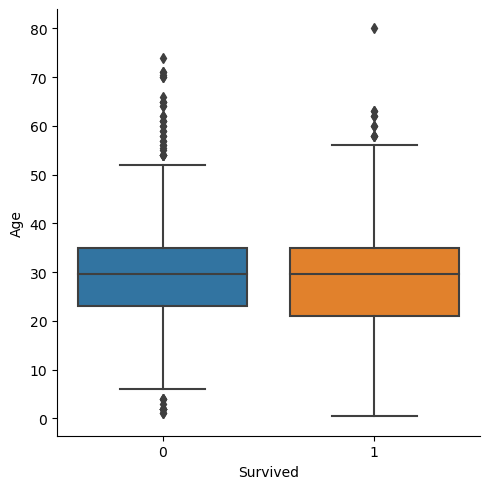

In [ ]:
plt.figure(figsize = (4,4))
sns.catplot(data= tic, x="Survived", y="Age", kind="box")

The graph for people that survived has more variance, but the median is the same for both survivabilities. The boxplot shows that there are more extreme values for  people who did not survive than for people that survived.


<AxesSubplot:xlabel='Age', ylabel='Count'>

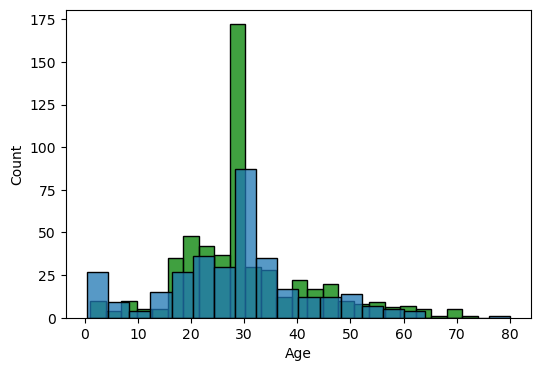

In [ ]:
plt.figure(figsize = (6,4))
sns.histplot(tic[tic['Survived'] == 0]['Age'], color= "green")
sns.histplot(tic[tic['Survived'] == 1]['Age'])

# The people who did not survive are the green ones on the distribution.

The distribution of the people that survived and did not survive is slightly skewed to the right, showing that children had more probability to survive.

#### Calculating Statistical  Chi square Test:

Conducting Chi-squared test to establish whether the Survived and Age variables are related.         
* Dependent Variable: Survived                                                                            
* Independent Variable: Age

Ho: The variables Age and Survived are independent from each other. They have no correlation

Ha: The variables Age and Survived are not independent from each other. They have a correlation

In [ ]:
tic['Age_ranges']= pd.cut(tic['Age'], bins= 8)


In [ ]:
age_Surv= pd.crosstab(tic['Survived'], tic['Age_ranges'])
age_Surv # Frecuency table of Sex and Survived

Age_ranges,"(0.34, 10.368]","(10.368, 20.315]","(20.315, 30.263]","(30.263, 40.21]","(40.21, 50.158]","(50.158, 60.105]","(60.105, 70.052]","(70.052, 80.0]"
Survived,,,,,,,,
0,26,71,271,86,53,25,13,4
1,38,44,136,69,33,17,4,1


In [ ]:
age_Surv_Per= pd.crosstab(tic['Survived'], tic['Age_ranges']).apply(lambda x: round((x/x.sum())*100,2), axis =0)
age_Surv_Per

Age_ranges,"(0.34, 10.368]","(10.368, 20.315]","(20.315, 30.263]","(30.263, 40.21]","(40.21, 50.158]","(50.158, 60.105]","(60.105, 70.052]","(70.052, 80.0]"
Survived,,,,,,,,
0,40.62,61.74,66.58,55.48,61.63,59.52,76.47,80.0
1,59.38,38.26,33.42,44.52,38.37,40.48,23.53,20.0


In [ ]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(age_Surv)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)
# chi2_stat > P
# 21.015 > 0.0037

Chi square value is  21.015582256479558
P value is 0.0037471559274657906
Degrees of Freedom: 7


Because Chi square value is bigger than P value and P value is smaller than 0.05, I have enough evidence to reject the Ho and conclude that the variables have a correlation and are dependent.

In [ ]:
print(tic[tic['Survived'] == 0]['Age_ranges'].describe()) # Information of people who not survived
print(tic[tic['Survived'] == 1]['Age_ranges'].describe()) # Information of people who survived

count                  549
unique                   8
top       (20.315, 30.263]
freq                   271
Name: Age_ranges, dtype: object
count                  342
unique                   8
top       (20.315, 30.263]
freq                   136
Name: Age_ranges, dtype: object


#### Conclusions:
The mean for people that survived is less (28.54) than the mean for people who did not survive (30.41). The boxplot shows that there were more extreme values for people who did not survive than for people that survived.
The Chi squared test shows that Age and Survived are dependent from each other. That means children had more probabilities to live.
The missing Age values could be adding an undefined bias to the hypothesis test and conclusions.

### Conclusions of Hypothesis:

Hypothesis 1: Pclass and Survived are dependent each other. First Class had more possibilities to live than Third Class.

Hypothesis 2: Sex and Survived are dependent each other. Female had more possibilities to live than Male.

Hypothesis 3: Age and Survived are dependent each other. Children in range of (0-10)years old had more possibilities to live than people in other ranges.


To analyze Ages as categorical variable, ranges were generated.

Th variables with missing variables (Cabin and embarked were ignored). Age was filled with the mean.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510